# BREAST CANCER

Dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the images.

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry 
- fractal dimension ("coastline approximation" - 1)

Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The dataset contains features derived from these measurements. For each feature, the mean value across all cells, the standard error (standard deviation), and the worst case were computed and reported in the data.

The target feature is diagnosis (0 = malignant, 1 = benign)

### 1. Importing the dataset

In [2]:
!pip install numpy pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 64.4 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 92.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 99.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 80.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 69.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [seaborn]0/11 [seaborn]ib]


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv('../data/raw/breast_cancer.csv')

### 2. Initial analysis

In [13]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Let's see the dimension of the dataset.

In [14]:
print(f"We have {df.shape[0]} records, and {df.shape[1]} columns.")

We have 569 records, and 31 columns.


Let's visualize the variables names:

In [15]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'diagnosis'],
      dtype='object')

Let's analyze each variable, and it's datatype, as well as missing values (which should be none based on the dataset):

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

We can work initially with the diagnosis as a factor (for easier exploratory data analysis and visualization), and change it before working with the  machine learning algorithm.

In [17]:
df['diagnosis'] = df['diagnosis'].map({0: 'benign', 1: 'malignant'}).astype('category')

We can have a quick look at the numeric values of the records:

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


We can also check the distribution of our target variable:

In [19]:
df['diagnosis'].value_counts()

diagnosis
malignant    357
benign       212
Name: count, dtype: int64

In [20]:
# We define the colors to be used during the analysis for malignant / benign
counts = df['diagnosis'].value_counts()
color_map = {
    'benign': 'lightblue',
    'malignant': 'plum'
}

colors = [color_map[cat] for cat in counts.index]

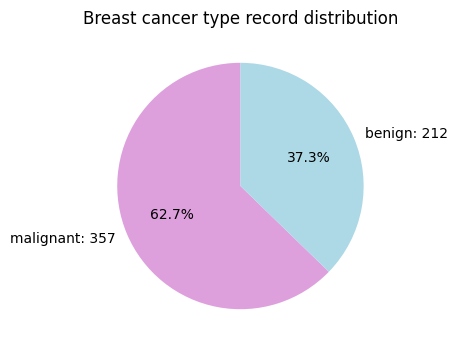

In [21]:
counts = df['diagnosis'].value_counts()
labels = [f"{cat}: {count}" for cat, count in zip(counts.index, counts.values)]

plt.figure(figsize=(4,4))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.title('Breast cancer type record distribution')
plt.show()

We can have a quick look at the variables values distribution based on the breast cancer type:

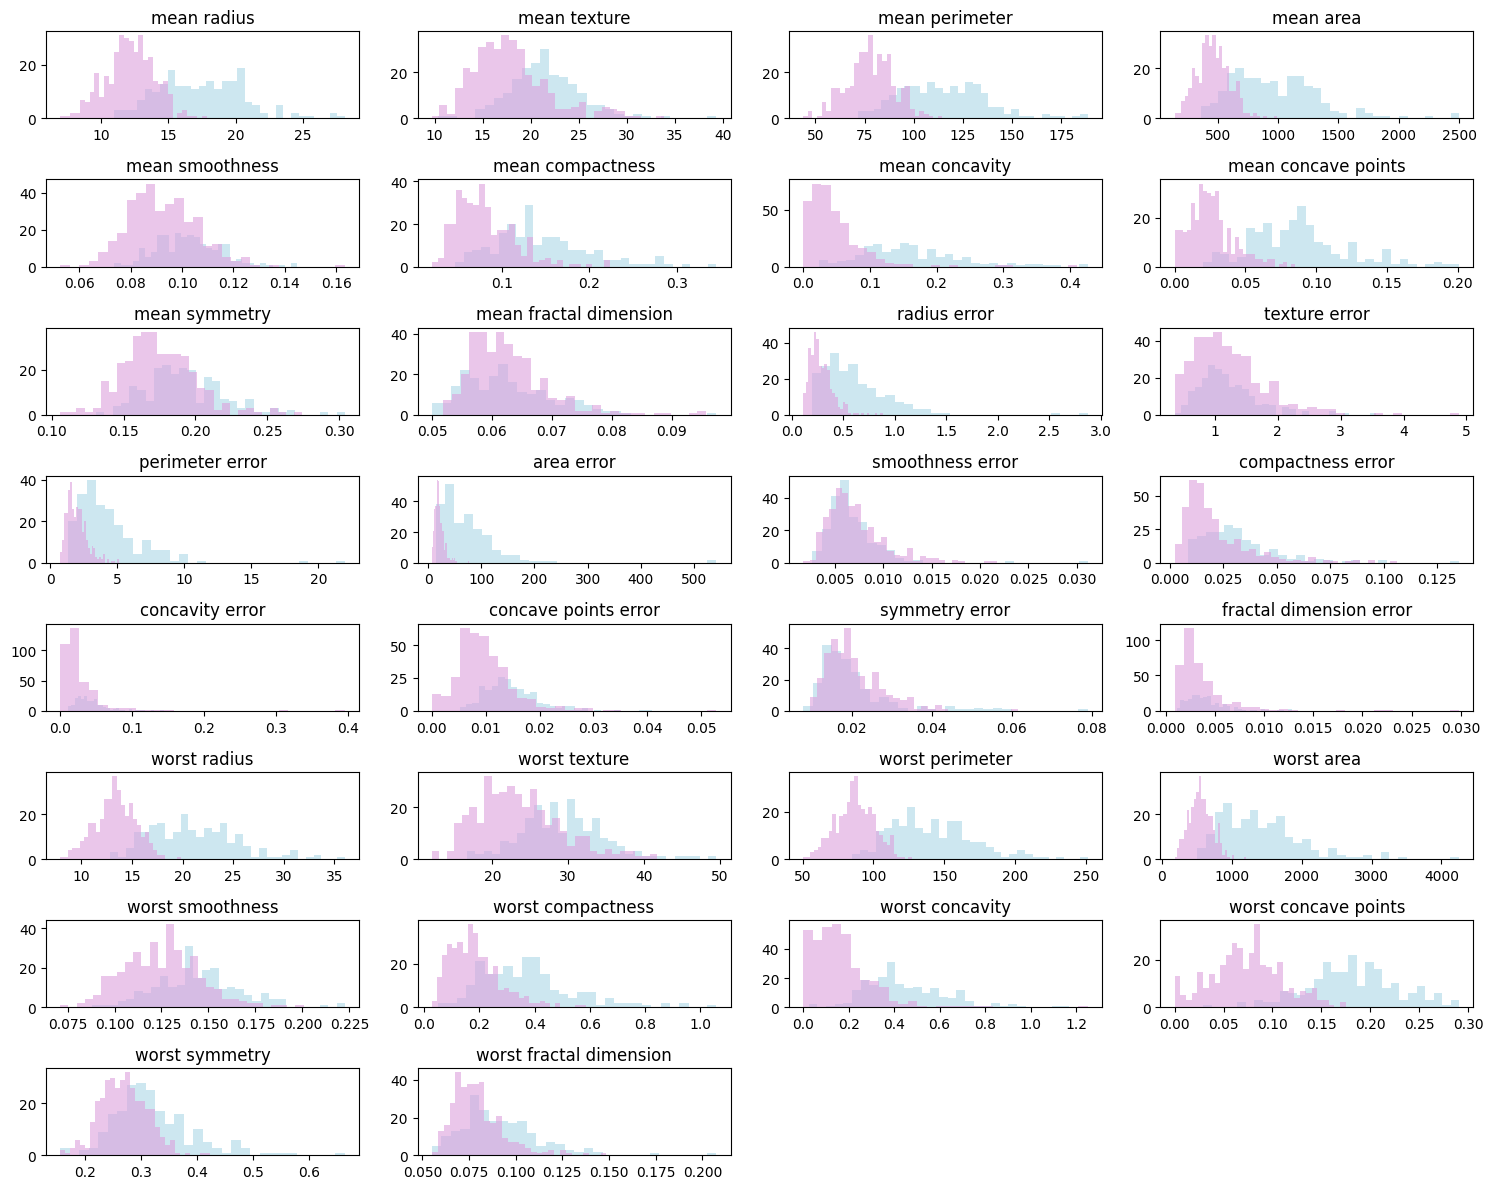

In [22]:
num_cols = df.columns[:-1]

n_cols = 4
n_rows = int(np.ceil(len(num_cols) / n_cols))

df_benign = df[df['diagnosis'] == 'benign']
df_malignant = df[df['diagnosis'] == 'malignant']

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

for ax, col in zip(axes, num_cols):
    ax.hist(
        df_benign[col],
        bins=30,
        alpha=0.6,
        color=color_map['benign'],
        label='Benign'
    )
    ax.hist(
        df_malignant[col],
        bins=30,
        alpha=0.6,
        color=color_map['malignant'],
        label='Malignant'
    )
    ax.set_title(col)

# Remove empty subplots
for ax in axes[len(num_cols):]:
    ax.remove()
    
plt.tight_layout()
plt.show()

FEature correlation heatmap

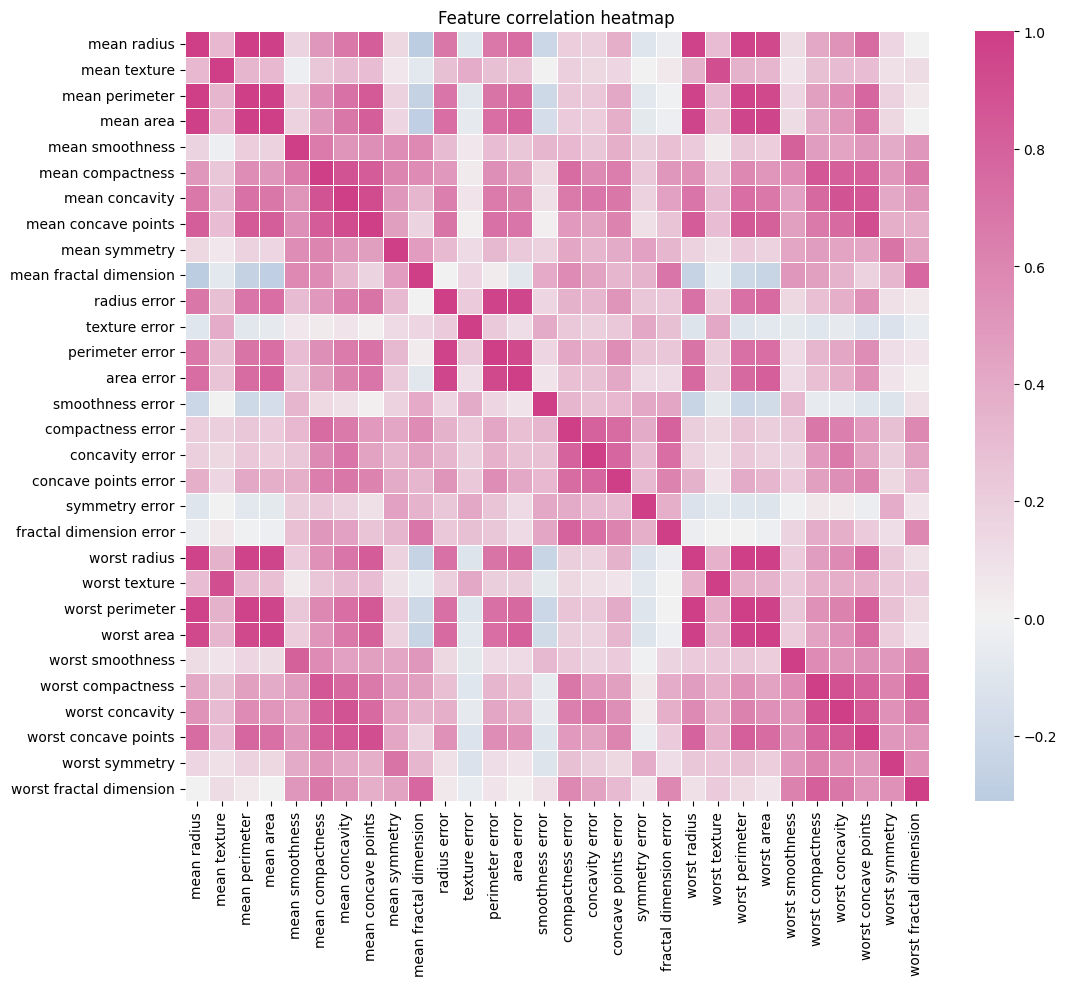

In [23]:
corr = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap=sns.diverging_palette(250, 345, as_cmap=True),
    center=0,
    linewidths=0.5
)
plt.title('Feature correlation heatmap')
plt.show()

Feature correlation just with the diagnosis

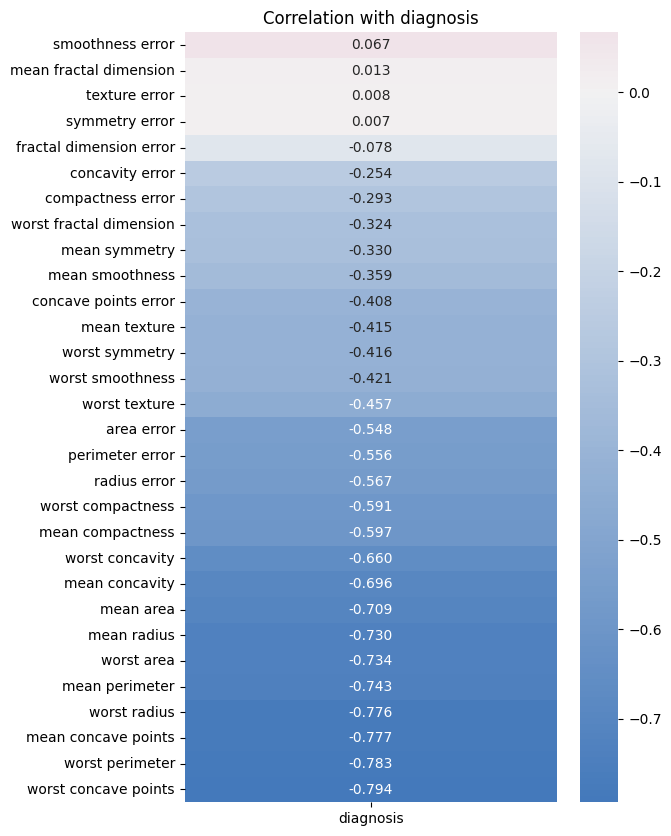

In [24]:
df_corr = df.copy()
df_corr['diagnosis'] = df_corr['diagnosis'].map({'benign': 0, 'malignant': 1})

corr_with_target = df_corr.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(6, 10))
sns.heatmap(
    corr_with_target.to_frame(),
    cmap=sns.diverging_palette(250, 345, as_cmap=True),
    center=0,
    annot=True,
    fmt=".3f"
)
plt.title('Correlation with diagnosis')
plt.show()

### 3. Renaming variables

We are going to rename the variables to facilitate the analysis, using a dictionary:

In [25]:
dict_items = {
     'radius' : 'rad',
     'texture' : 'tex',
     'perimeter' : 'per',
     'area':'area',
     'smoothness':'smooth',
     'compactness':'comp',
     'concavity':'conc',
     'concave points':'conc_p',
     'symmetry':'sym',
     'fractal dimension':'fract_dim'
}

prefixes = {
    'mean': 'm',
    'error': 'err',
    'worst': 'w'
}

dict_names = {}
for p_key, p_val in prefixes.items():
    for i_key, i_val in dict_items.items():
        # Handle the format: "radius error" vs "mean radius"/"worst radius"
        if p_key == 'mean' or p_key == 'worst':
            key = f"{p_key} {i_key}"
        else:
            key = f"{i_key} {p_key}" # Putting 'error' at the end
            
        dict_names[key] = f"{p_val}_{i_val}"

# Add diagnosis at the end
dict_names['diagnosis'] = 'D'

In [26]:
df.rename(columns =dict_names, inplace = True)
df.head()

,m_rad,m_tex,m_per,m_area,m_smooth,m_comp,m_conc,m_conc_p,m_sym,m_fract_dim,...,w_tex,w_per,w_area,w_smooth,w_comp,w_conc,w_conc_p,w_sym,w_fract_dim,D
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,benign
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,benign
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,benign
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,benign


Testing oding in own branch.